In [1]:
cd downloads

[WinError 2] The system cannot find the file specified: 'downloads'
C:\Users\mestrg01\Downloads


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Random Forest Metrics:
Mean Squared Error: 104.86338598884737
Mean Absolute Error: 7.9250820281453755
Median Absolute Error: 5.107067433035418
Max Error: 21.392932566964582

Random Forest Cross-Validation Scores:
Mean MSE: 42.46003395033056
Std MSE: 14.976971038563873


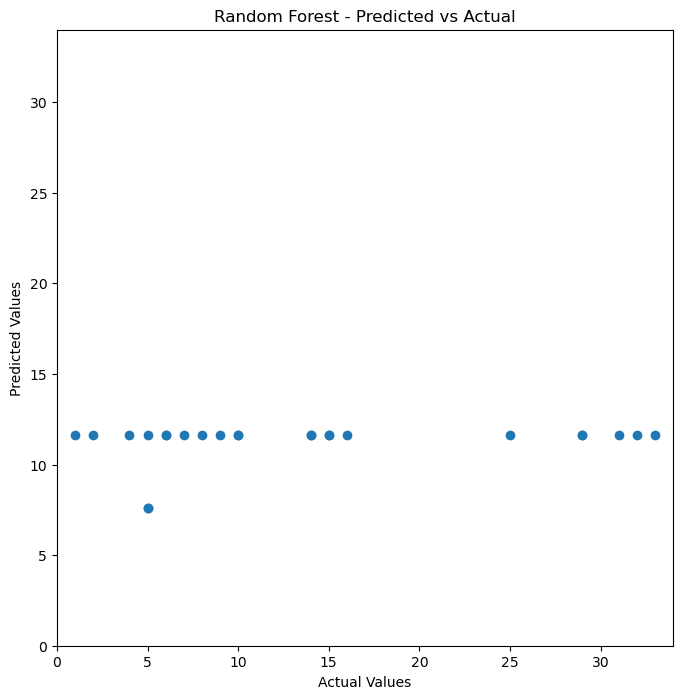


Gradient Boosting Metrics:
Mean Squared Error: 104.22614834776425
Mean Absolute Error: 7.874931736211248
Median Absolute Error: 5.1823329748045985
Max Error: 21.3176670251954

Gradient Boosting Cross-Validation Scores:
Mean MSE: 41.023203742856474
Std MSE: 13.416377499275196


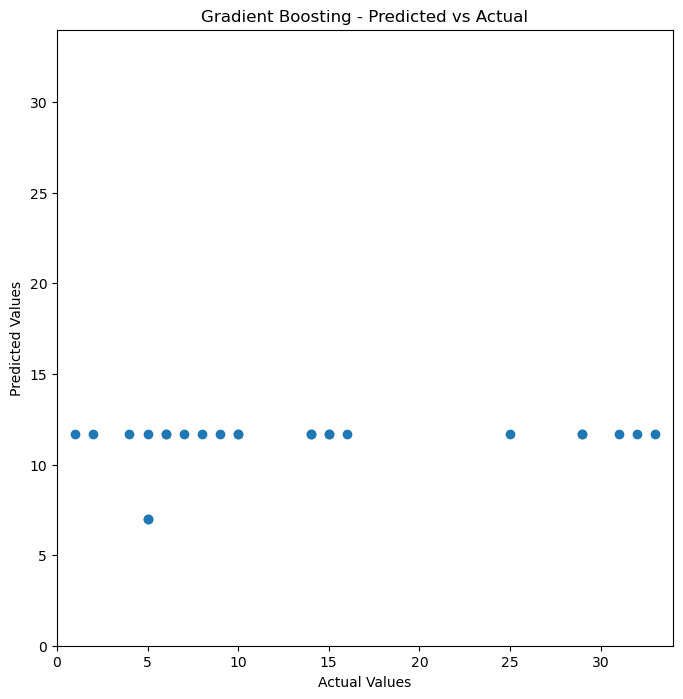


MLP Metrics:
Mean Squared Error: 141.34726720562472
Mean Absolute Error: 8.305130823653059
Median Absolute Error: 5.448955233398543
Max Error: 27.241914922787675


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLP Cross-Validation Scores:
Mean MSE: 54.21590989339868
Std MSE: 22.13408037906581


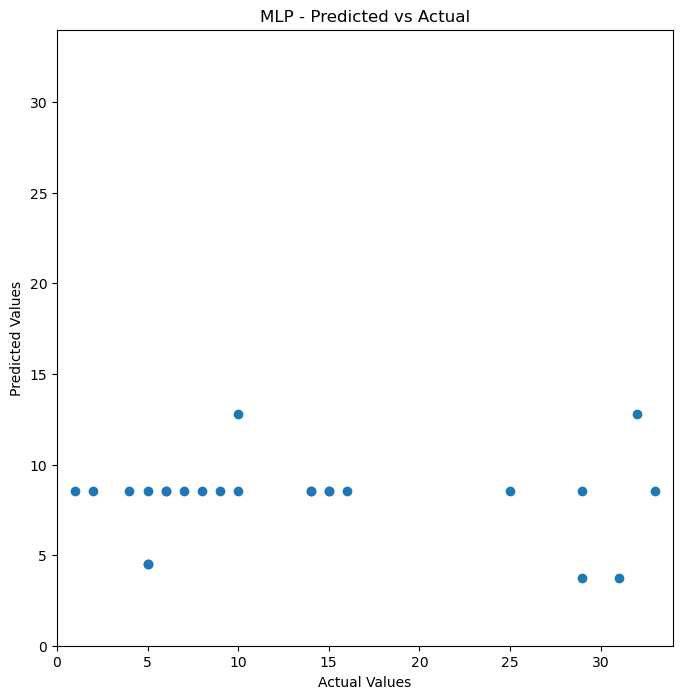


LinearRegression Metrics:
Mean Squared Error: 96.94648489647945
Mean Absolute Error: 7.743547418967584
Median Absolute Error: 6.1128451380552224
Max Error: 20.88715486194478

LinearRegression Cross-Validation Scores:
Mean MSE: 2.357356995341157e+29
Std MSE: 4.714713990682314e+29


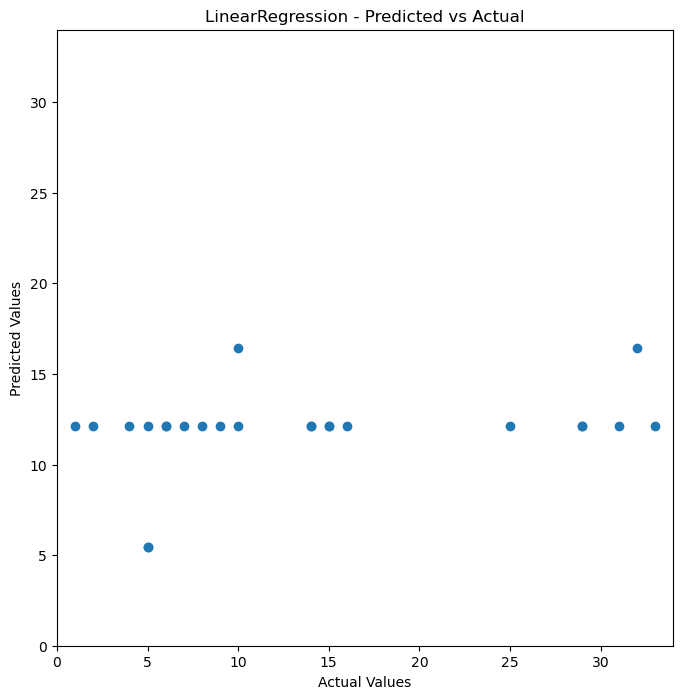


Lasso Metrics:
Mean Squared Error: 108.36973409507198
Mean Absolute Error: 8.230166370751768
Median Absolute Error: 5.862911344632195
Max Error: 21.536173759756835

Lasso Cross-Validation Scores:
Mean MSE: 45.70059886836374
Std MSE: 14.407506590714302


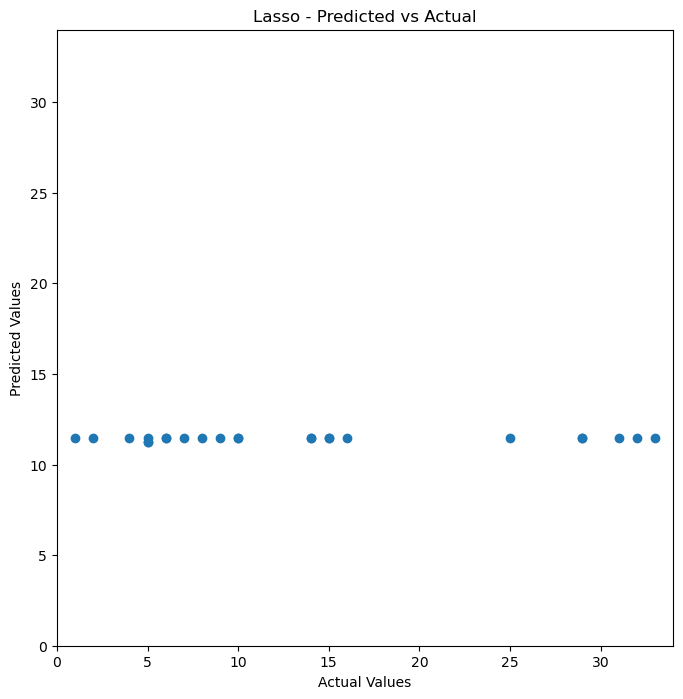


SVR Metrics:
Mean Squared Error: 119.57303027823464
Mean Absolute Error: 8.351842460864193
Median Absolute Error: 5.600078493426228
Max Error: 23.227222606226626

SVR Cross-Validation Scores:
Mean MSE: 43.91992357424809
Std MSE: 15.308865188137771


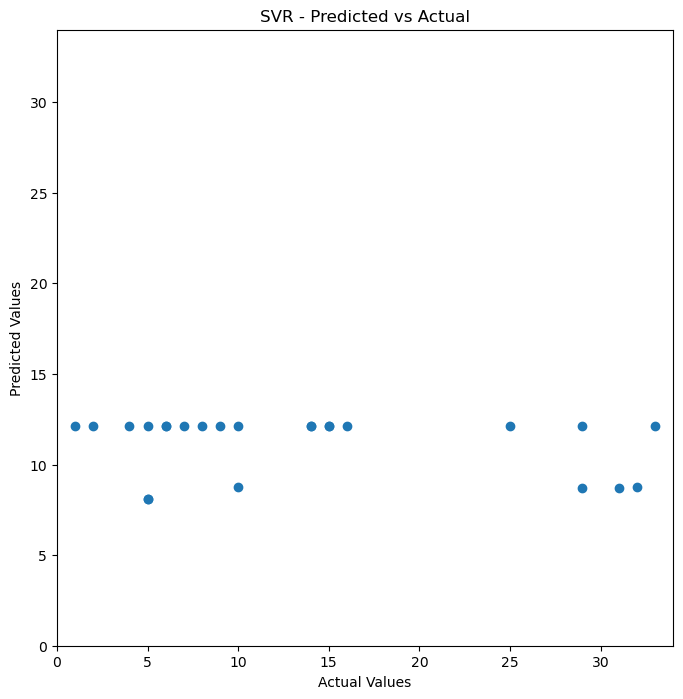


KNeighborsRegressor Metrics:
Mean Squared Error: 106.065
Mean Absolute Error: 7.691666666666666
Median Absolute Error: 5.8
Max Error: 24.4

KNeighborsRegressor Cross-Validation Scores:
Mean MSE: 50.6606783625731
Std MSE: 20.36716076946851


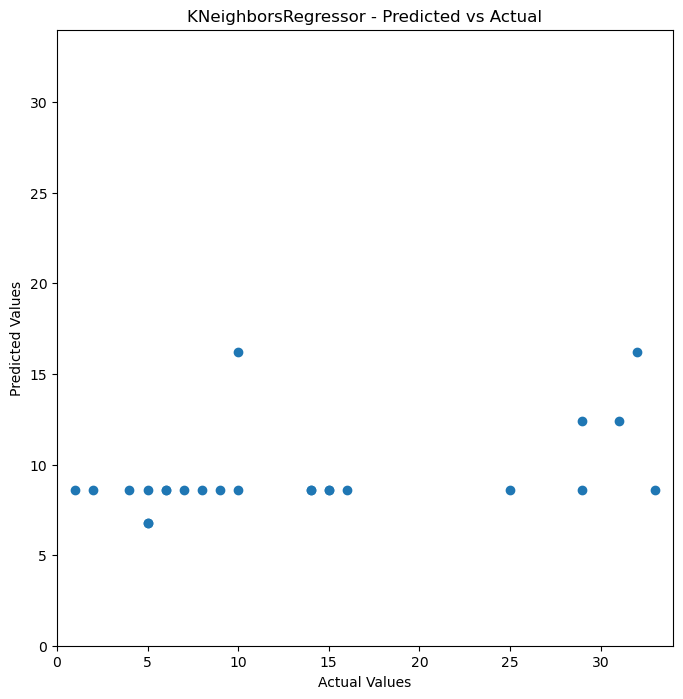


DecisionTreeRegressor Metrics:
Mean Squared Error: 102.6911490483539
Mean Absolute Error: 7.875
Median Absolute Error: 5.486111111111111
Max Error: 21.01388888888889

DecisionTreeRegressor Cross-Validation Scores:
Mean MSE: 41.61713383374722
Std MSE: 15.937816301270592


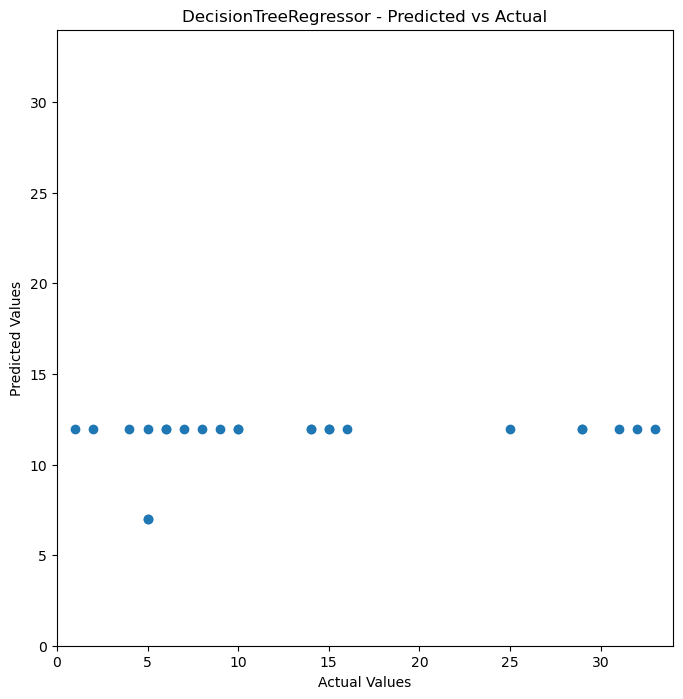

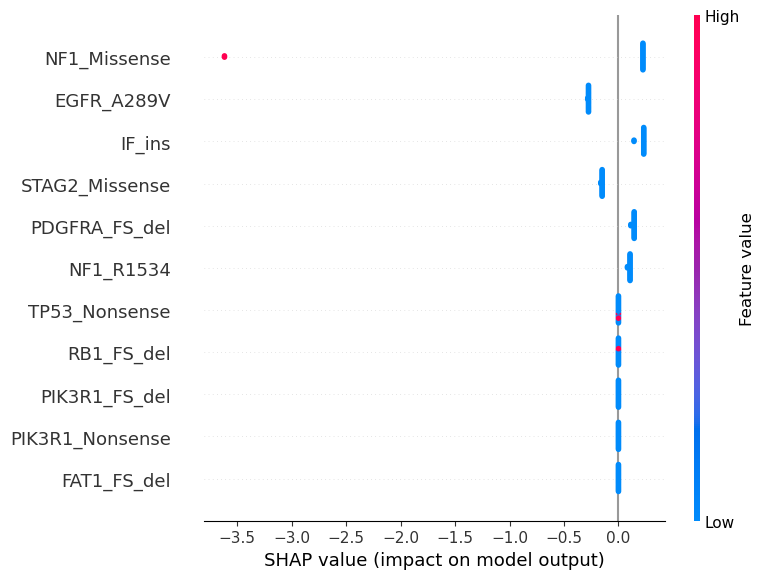

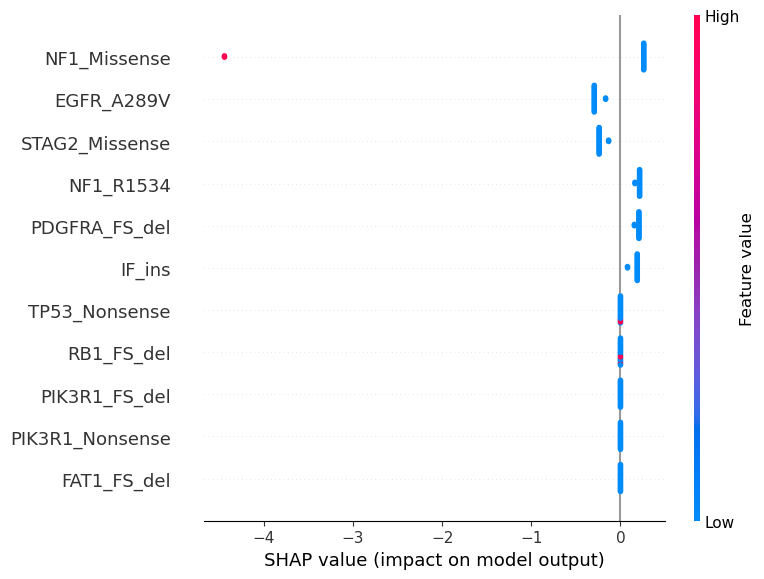

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, max_error
import shap

# Assuming you have a CSV file as your dataset
data = pd.read_csv('datagliomamskoscox2.csv')
#datacoadmskML4
# Handle missing values (if any)
data = data.dropna()

# Encode categorical variables (assuming they are object types)
data_encoded = pd.get_dummies(data, drop_first=True)

# Split the data into features (X) and target variable (y)
X = data_encoded.drop('Overall_Survival_Months', axis=1)  # Features
y = data_encoded['Overall_Survival_Months']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning using RandomizedSearchCV

# Random Forest
param_dist_rf = {
    'n_estimators': [10, 20, 50, 100, 150, 200, 250, 300, 350, 500, 750, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
    'min_samples_leaf': [1, 2, 4, 8, 12, 15, 20]
}
rf_model = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist_rf, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search_rf.fit(X_train_scaled, y_train)
best_rf_model = random_search_rf.best_estimator_

# Gradient Boosting
param_dist_gb = {
    'n_estimators': [10, 20, 50, 100, 150, 200, 250, 300, 350, 500, 750, 1000],
    'max_depth': [3, 5, 7, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
    'min_samples_leaf': [1, 2, 4, 8, 12, 15, 20],
    'learning_rate': [0.01, 0.1, 0.2, 0.5]
}
gb_model = GradientBoostingRegressor(random_state=42)
random_search_gb = RandomizedSearchCV(gb_model, param_distributions=param_dist_gb, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search_gb.fit(X_train_scaled, y_train)
best_gb_model = random_search_gb.best_estimator_

# MLP Regression
mlp_model = MLPRegressor(random_state=42)
mlp_model.fit(X_train_scaled, y_train)

#other models
LR_model = LinearRegression()
LR_model.fit(X_train_scaled, y_train)

Lasso_model = Lasso()
Lasso_model.fit(X_train_scaled, y_train)

SVR_model = SVR()
SVR_model.fit(X_train_scaled, y_train)

KNR_model = KNeighborsRegressor()
KNR_model.fit(X_train_scaled, y_train)

DTR_model = DecisionTreeRegressor()
DTR_model.fit(X_train_scaled, y_train)

# Define models and model_names
models = [best_rf_model, best_gb_model, mlp_model, LR_model, Lasso_model, SVR_model, KNR_model, DTR_model]
model_names = ['Random Forest', 'Gradient Boosting', 'MLP', 'LinearRegression', 'Lasso', 'SVR', 'KNeighborsRegressor', 'DecisionTreeRegressor']

# Model Evaluation with Cross-Validation
for model, name in zip(models, model_names):
    predictions = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    medae = median_absolute_error(y_test, predictions)
    maxe = max_error(y_test, predictions)

    print(f"\n{name} Metrics:")
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("Median Absolute Error:", medae)
    print("Max Error:", maxe)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Print cross-validation results
    print(f"\n{name} Cross-Validation Scores:")
    print("Mean MSE:", -cv_scores.mean())
    print("Std MSE:", cv_scores.std())
    
    # Scatter Plot
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, predictions)
    plt.title(f'{name} - Predicted vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.xlim([0, max(y_test)+1])
    plt.ylim([0, max(y_test)+1])
    plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to be equal
    plt.show()
    
# Example for using Shapley values with a model
explainerrf = shap.Explainer(best_rf_model)
shap_valuesrf = explainerrf.shap_values(X_test_scaled)
shap.summary_plot(shap_valuesrf, X_test_scaled, feature_names=X.columns)

explainergb = shap.Explainer(best_gb_model)
shap_valuesgb = explainergb.shap_values(X_test_scaled)
shap.summary_plot(shap_valuesgb, X_test_scaled, feature_names=X.columns)


Stacked Model Metrics:
Mean Squared Error: 101.43438938582109
Mean Absolute Error: 7.7688273079351235
Median Absolute Error: 5.148613895659386
Max Error: 21.851386104340612


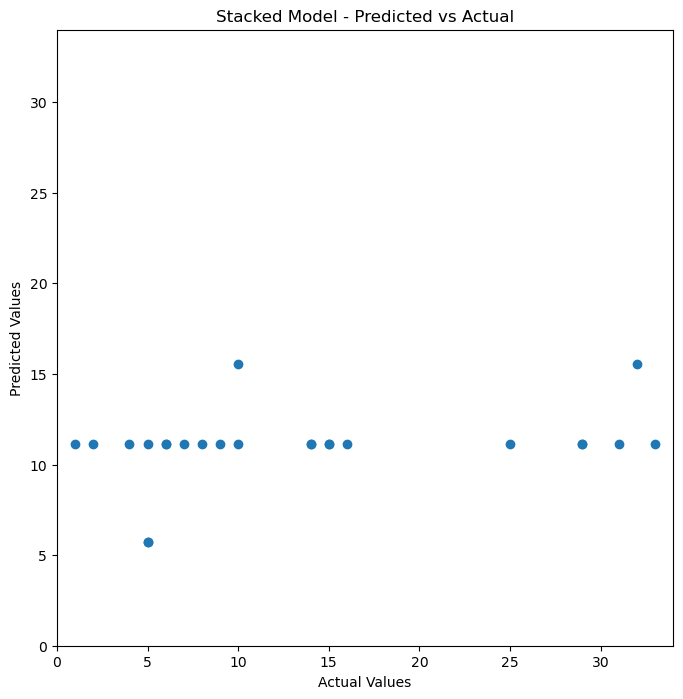

In [3]:
from sklearn.ensemble import StackingRegressor

# Different base models
new_base_model_1 = RandomForestRegressor(max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=10)
new_base_model_2 = GradientBoostingRegressor(max_depth=1, min_samples_leaf=1, min_samples_split=20, n_estimators=200)

# Create StackingRegressor with new base models
stacked_model_new = StackingRegressor(
    estimators=[('BaseModel1', new_base_model_1), ('BaseModel2', new_base_model_2)],
    final_estimator=best_rf_model  # You can also experiment with a different meta-model
)

# Train the new stacked model
stacked_model_new.fit(X_train_scaled, y_train)

# Evaluate the new stacked model
predictions_stacked_new = stacked_model_new.predict(X_test_scaled)

mse_stacked_new = mean_squared_error(y_test, predictions_stacked_new)
mae_stacked_new = mean_absolute_error(y_test, predictions_stacked_new)
medae_stacked_new = median_absolute_error(y_test, predictions_stacked_new)
maxe_stacked_new = max_error(y_test, predictions_stacked_new)

print("\nStacked Model Metrics:")
print("Mean Squared Error:", mse_stacked_new)
print("Mean Absolute Error:", mae_stacked_new)
print("Median Absolute Error:", medae_stacked_new)
print("Max Error:", maxe_stacked_new)

# Scatter Plot for New Stacked Model
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions_stacked_new)
plt.title('Stacked Model - Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([0, max(y_test)+1])
plt.ylim([0, max(y_test)+1])
plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to be equal
plt.show()


Ensemble Model Metrics:
Mean Squared Error: 104.53592380630516
Mean Absolute Error: 7.90000688217831
Median Absolute Error: 5.144700203920008
Max Error: 21.35529979607999


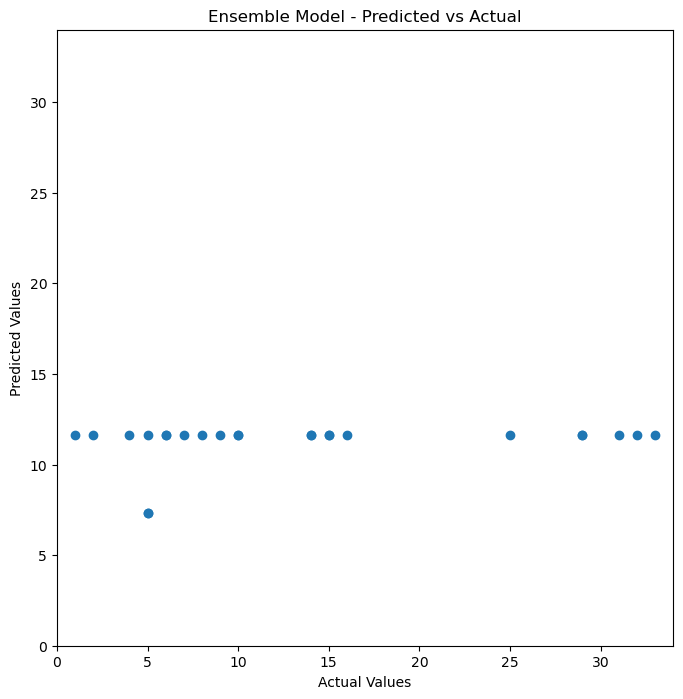

In [4]:
from sklearn.ensemble import VotingRegressor

# Best-performing models
best_rf_model = random_search_rf.best_estimator_
best_gb_model = random_search_gb.best_estimator_

# Create ensemble using VotingRegressor
ensemble_model = VotingRegressor([
    ('RandomForest', best_rf_model),
    ('GradientBoosting', best_gb_model)
])

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Evaluate the ensemble model
predictions_ensemble = ensemble_model.predict(X_test_scaled)

mse_ensemble = mean_squared_error(y_test, predictions_ensemble)
mae_ensemble = mean_absolute_error(y_test, predictions_ensemble)
medae_ensemble = median_absolute_error(y_test, predictions_ensemble)
maxe_ensemble = max_error(y_test, predictions_ensemble)

print("\nEnsemble Model Metrics:")
print("Mean Squared Error:", mse_ensemble)
print("Mean Absolute Error:", mae_ensemble)
print("Median Absolute Error:", medae_ensemble)
print("Max Error:", maxe_ensemble)

# Scatter Plot for Ensemble Model
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions_ensemble)
plt.title('Ensemble Model - Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([0, max(y_test)+1])
plt.ylim([0, max(y_test)+1])
plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to be equal
plt.show()

In [5]:
# Hyperparameter Tuning for Random Forest Regressor
param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500, 1000],
    'max_depth': [None, 1, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Feature Importance Analysis
feature_importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance_df)

# Cross-Validation
cv_results = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_results
print("Cross-Validation Mean Squared Error:", cv_mse_scores.mean())

# Make predictions on the test set
predictions = best_rf_model.predict(X_test)

# Calculate and print regression metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
medae = median_absolute_error(y_test, predictions)
maxe = max_error(y_test, predictions)

# Print the results
print(f"Test Mean Squared Error: {mse}")
print(f"Test Mean Absolute Error: {mae}")
print(f"Test Median Absolute Error: {medae}")
print(f"Test Max Error: {maxe}")

Best Hyperparameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 10}
Feature Importance:
            Feature  Importance
7    STAG2_Missense    0.220469
9        EGFR_A289V    0.132352
3     PDGFRA_FS_del    0.115790
10        NF1_R1534    0.111090
1       FAT1_FS_del    0.104908
2      NF1_Missense    0.096396
0            IF_ins    0.061493
4   PIK3R1_Nonsense    0.051759
6        RB1_FS_del    0.049739
5     PIK3R1_FS_del    0.035674
8     TP53_Nonsense    0.020330
Cross-Validation Mean Squared Error: 56.793076429125776
Test Mean Squared Error: 103.6289647085437
Test Mean Absolute Error: 7.977002801120449
Test Median Absolute Error: 5.132140260355307
Test Max Error: 21.367859739644693


In [6]:
# Hyperparameter Tuning for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500, 1000],
    'max_depth': [None, 1, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

gb_model = GradientBoostingRegressor()
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model from the grid search
best_gb_model = grid_search.best_estimator_

# Feature Importance Analysis
feature_importances = best_gb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance_df)

# Cross-Validation
cv_results = cross_val_score(best_gb_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_results
print("Cross-Validation Mean Squared Error:", cv_mse_scores.mean())

# Make predictions on the test set
predictions = best_gb_model.predict(X_test)

# Calculate and print regression metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
medae = median_absolute_error(y_test, predictions)
maxe = max_error(y_test, predictions)

# Print the results
print(f"Test Mean Squared Error: {mse}")
print(f"Test Mean Absolute Error: {mae}")
print(f"Test Median Absolute Error: {medae}")
print(f"Test Max Error: {maxe}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 50, 'n_estimators': 20}
Feature Importance:
            Feature  Importance
7    STAG2_Missense    0.174107
3     PDGFRA_FS_del    0.157407
10        NF1_R1534    0.147708
9        EGFR_A289V    0.137182
1       FAT1_FS_del    0.123217
2      NF1_Missense    0.102871
0            IF_ins    0.074972
4   PIK3R1_Nonsense    0.046706
5     PIK3R1_FS_del    0.035829
6        RB1_FS_del    0.000000
8     TP53_Nonsense    0.000000
Cross-Validation Mean Squared Error: 56.17569248456381
Test Mean Squared Error: 103.31626659611273
Test Mean Absolute Error: 7.9282037421994405
Test Median Absolute Error: 5.408055848553634
Test Max Error: 21.091944151446366



Mean Ensemble Model Metrics:
Mean Squared Error: 39.469847535388666
Mean Absolute Error: 5.069975326605793
Median Absolute Error: 4.1559959289343915
Max Error: 21.01196634927414


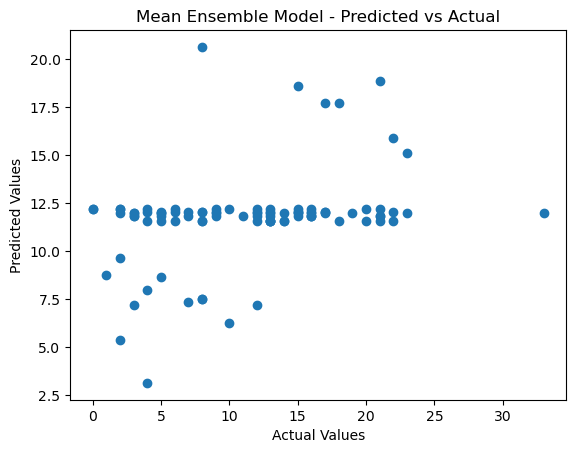

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, max_error

# Assuming you have already defined your models (best_rf_model, best_gb_model, mlp_model, etc.)

# Define models and model_names
models = [best_rf_model, best_gb_model]
model_names = ['Random Forest', 'Gradient Boosting']

# List to store predictions from each fold
all_fold_predictions = []

# Perform cross-validated predictions and store predictions in the list
for model, name in zip(models, model_names):
    predictions_fold = cross_val_predict(model, X_train_scaled, y_train, cv=5)
    all_fold_predictions.append(predictions_fold)

# Calculate the mean prediction across all folds
mean_predictions = np.mean(all_fold_predictions, axis=0)

# Evaluate the mean predictions
mse_mean = mean_squared_error(y_train, mean_predictions)
mae_mean = mean_absolute_error(y_train, mean_predictions)
medae_mean = median_absolute_error(y_train, mean_predictions)
maxe_mean = max_error(y_train, mean_predictions)  # Added this line

print("\nMean Ensemble Model Metrics:")
print("Mean Squared Error:", mse_mean)
print("Mean Absolute Error:", mae_mean)
print("Median Absolute Error:", medae_mean)
print("Max Error:", maxe_mean)

# Scatter Plot for Mean Ensemble Model with Actual Values below 40
plt.scatter(y_train, mean_predictions)
plt.title('Mean Ensemble Model - Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

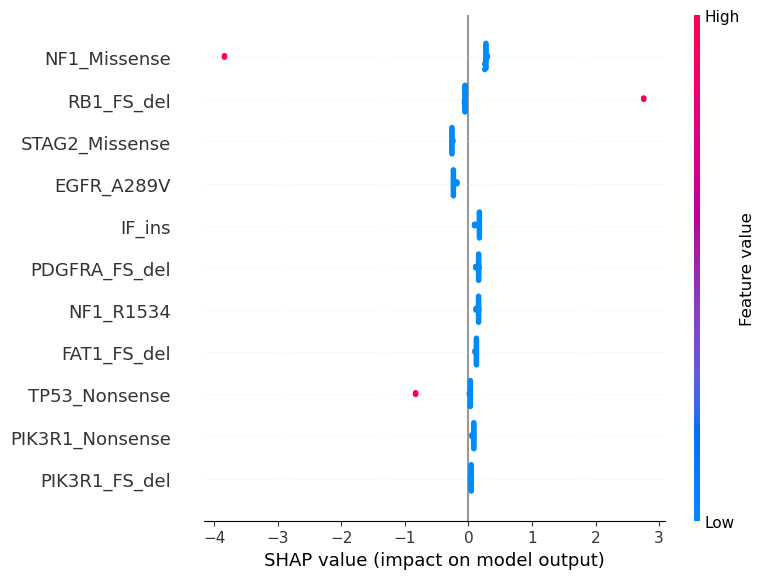

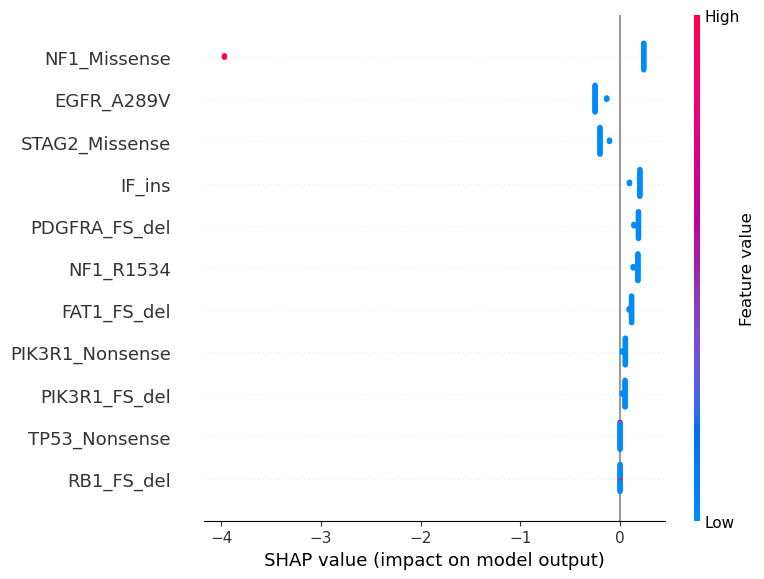

In [8]:
# Example for using Shapley values with a model
explainerrf = shap.Explainer(best_rf_model)
shap_valuesrf = explainerrf.shap_values(X_test_scaled)
shap.summary_plot(shap_valuesrf, X_test_scaled, feature_names=X.columns)

explainergb = shap.Explainer(best_gb_model)
shap_valuesgb = explainergb.shap_values(X_test_scaled)
shap.summary_plot(shap_valuesgb, X_test_scaled, feature_names=X.columns)